<a href="https://colab.research.google.com/github/OldGoose/ORA-Project-Santa-2021---The-Merry-Movie-Montage/blob/main/Santa_2021_TSP_LKH_Robin_Houston%26Egan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  Robin Houston & Egan propsed 7! superpertation with LKH.

In this notebook, we use 7! superpermutation which from Robin Houston to our initial data. The flowchart as below:
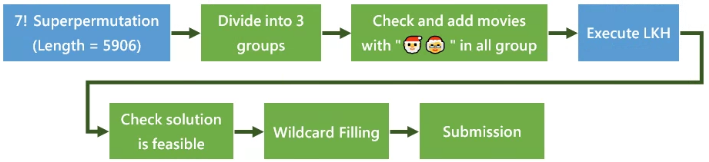
#### REFERENCES
https://www.kaggle.com/cdeotte/santa-2021-tsp-baseline-2500 <br />
https://www.kaggle.com/yosshi999/wildcard-postprocessing-using-dynamic-programming

### Import Package

In [ ]:
import itertools
import random
import numpy as np
import pandas as pd
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
import datetime
from tqdm.notebook import tqdm
import os
from google.colab import drive
drive.mount('/content/drive')
os.chdir('/content/drive/My Drive/Santa2021') 

!wget http://webhotel4.ruc.dk/~keld/research/LKH-3/LKH-3.0.7.tgz
!tar xvfz LKH-3.0.7.tgz
!cd LKH-3.0.7; make

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
--2022-01-14 02:21:37--  http://webhotel4.ruc.dk/~keld/research/LKH-3/LKH-3.0.7.tgz
Resolving webhotel4.ruc.dk (webhotel4.ruc.dk)... 130.225.220.230
Connecting to webhotel4.ruc.dk (webhotel4.ruc.dk)|130.225.220.230|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2315763 (2.2M) [application/x-gzip]
Saving to: ‘LKH-3.0.7.tgz.20’

LKH-3.0.7.tgz.20    100%[===================>]   2.21M  2.00MB/s    in 1.1s    

2022-01-14 02:21:39 (2.00 MB/s) - ‘LKH-3.0.7.tgz.20’ saved [2315763/2315763]

LKH-3.0.7/
LKH-3.0.7/pr2392.par
LKH-3.0.7/whizzkids96.atsp
LKH-3.0.7/Makefile
LKH-3.0.7/whizzkids96.par
LKH-3.0.7/pr2392.tsp
LKH-3.0.7/DOC/
LKH-3.0.7/README.txt
LKH-3.0.7/SRC/
LKH-3.0.7/SRC/Penalty_CVRPTW.c
LKH-3.0.7/SRC/RestoreTour.c
LKH-3.0.7/SRC/SolveKMeansSubproblems.c
LKH-3.0.7/SRC/IsCommonEdge.c
LKH-3.0.7/SRC/Penalty_TSPPD.c
LKH-3.0.7/SRC/ReadProble

### 1. 7! Supermutation
We can get the superpermutation for n = 7 from Robin Houston and Egan which length 5906 on 27 February 2019.

In [ ]:
best = "12345671234561723456127345612374561327456137245613742561374526137456213745612347561324756134275613472561347526134756213475612345761234516723451627345162374516234751623457162345176234512673451263745126347512634571263451726345127634512367451236475123645712364517236451273645123764512346751234657123465172346512734651243765124367512436571243651724365127436512473651246375124635712463517246351274635124763512467351426735146273514672351467325146735216473521674352167345216374521634752163457216345271634521764352176453271645327614532764153276451326745132647513264571326451732645137264531726453712645372164537261453726415372645132764531276453217645231764521376452173654217365241736521473652174365217346521736452176345216735421637542163574216354721635427163542176354216735241637524163572416352741635247163524176352416735214673512465371246531724653127465312476531246753142675314627531467253146752316475321647531264753162475316427531647253164752316745321674531267453162745316724531674253167452316754231675243167523416752314675321467531246573124651372465132746513247651324671532467135246713254671235467125346712543671524367154236715432675143267541326754312675432167543261745362174536127453617245361742536174523617453261743526174325617432651742365174263517426531742651374265173426157342617534216753421765342175634217536421753462175342617354261734526173425617342651743261574362157436125743162574312657413265741236574126357412653741265734126574312567413256741235674125367412563741256734125674312576413257614325761342576132457613254761325746132576412357641253761425376124537612543761524376154237615432761543726154376215437612534761253746125376412573641257634125764312574631257436152743615724361574236157432617543621754361275436172543617524361754236175432671543627154367215436712546371254673125476312547361524736154273615472361547326145736214576321475632147653214763521476325147632154763214576231457621345762143576214537621457361245736142573614527361457236145732614753621475361247536142753614725361475236147532614735261473256147326514723651472635147265314726513472651437265147326154736215473612547316254731265471326547123654712635471265347126543716253471625374162537146253716425371624537162543716524371654237165432716543721654371265473125647132564712356471253647125634712564372156437251643275614327564132756431275643217564327156432751643257163425176342516734251637425163472516342751634257163245176324516732451637245163274516324751632457163254716325741632571463275146327154632714563271465327146352714632571643527164357216435712643517264351276435126743512647351264375126435716243517624351672435162743516247351624375162435716423517642351674235164723516427351642375146237514263751423675142376514273651427635142765314276513427651432765142375614235761423567143256714352671435627143567214356712435617243561274356124735612437561243576124356714235617423561472356142735614237516423571643251764325167432516473251643725614372564137256431725643712564731254671324567132465713246751324615732461753246173524617325416723541762354716235476123547621354762315467231546273154623715462317564231576421356742135647213564271356421735624137562413576241356724135627413562471356241735621473562174356217345621735462173564213756421357642153746215374261537421653742156374215367421537642157364215763421576432157642315674231564723156427315642371564231756243157624315672431562743156247315624371562431756234157623415672341562734156237415623471562341756231475623174562317546321745632174653217463521746325174632157463217546312754631725463175246315724631527463152476315246731524637152463175426315742631547263154276315426731542637154263175462315746235174623571462357416235746123574621357462315476235147623541726354172365417235641723546172354167253417625314762531746253176425317624531762543176524317654231765432176543127654317265431762534172653417256341725364172534617253416725431672541367251436725134672153476215347261534721653472156347215364721534672135467213456721346572136457213654721365742136572413657214365721346752136475213674521367542136752413675214376521437562143752614375216437521463725146372154637214563721465372146357214637521436752134672513647251367425136724513672541637254167325417632541736251473625174362517346257136425713624571362547136257413625714362571346275136427513624751362745136275416327541623754126375412367541237654132765413726541376251437625134762513746251376425137624513762541376524137654213765412375641237546132754613725461375246137542613754621375461237541627354126735412763541273654127356412735461273541627534126753412765341275634127536412753461275341627543162754136275143627513462715342671354267134526713425671342657143265714236571426357142653714265731426571342675134267153427615342716534271563427153642715346271354627134562713465271364527136542713652471365274136527143652713462573146257341625734612573462157346251736425173624517362541732654173256417325461732456173246517324615372461532746153247615324167532416573214657321645731264573162457316425731645273165427316524731652743165273416527314652731645723165472316574231657243165723416572314657231645732165473216574321657342165732416537241653274165324716532417653241567321456731245637124563172456312745631247563124576312456731425637142563174256314725631427563142576314256731452637145236714532671453627145367214536712453671425367145237614523716452371465237416523746152347651234765213476523147652341765234716523476152346715234617523461572346152734615237465123746521374652317465237145623714526317452631475263145726314527631452673145627314567231456732154673215647321567432156734215673241563724156327415632471563241756324157632415367241536274153624715362417536241573624153762415326741532647153264175326415732641523764152367415236471523641752364157236415273641526374152634715263417526341572634152763415267341526437152643175264315726431527643152674315264731526413752641357261435726134572613547261357426135724613572641352761435276134527613542761352476135274613527641352674135264713526417352641"
len(best)

5906

### 1. Divide into 3 groups
From this formula $𝑝_𝑘^𝑛 = \frac{𝑛!}{(𝑛−𝑘)!}$ we can get the following seven symbols (🎅🤶🦌🧝🎄🎁🎀) with a total of 5040 permutations (ie, a total of 5040 movie)
Due to the constrain of the problem, there are a total of 120 movies starting with these 🎅🤶 two symbols, and we have to put them into each group.
After deducting those 120 films, we divide the remaining 4920 films into three equal parts.

First, we need to decide which code is represent 🎅🤶.

In [ ]:
split_id = [len(best) // 3, len(best)*2//3]
t1, t2 = split_id

strings = [best[:t1], best[t1:t2], best[t2:]]
g1 = strings[0]
g2 = strings[1]
g3 = strings[2]

check = []
for i in range(1,8):
    for j in range(1,8):
        if i != j:
            check.append(str(i)+str(j))
check = np.array(check)

data = pd.DataFrame()
column = list(check)
index = ['group1','group2','group3']
data = pd.DataFrame(columns=column,index=index)

for i in list(check):
    data[i][0] = (g1.count(i))
    data[i][1] = (g2.count(i))
    data[i][2] = (g3.count(i))
data = data.append(data.std(axis= 0) ,ignore_index=True)
data1 = data.T[3]
for i in range(len(data1)):
    if data1[i] == data1.min(axis=0):
        min_id = (data1.index[i]) 
print("The Min Standard Deviation is: " + str(data.stack().min()) + " at "  + (min_id) + ".")

The Min Standard Deviation is: 0.5773502691896258 at 24.


So, we choose 24 to represent the 🎅🤶.

In [ ]:
def is_perm(s):
    y = True
    for k in range(1,8):
        y = y&(str(k) in s)
        if not y: break
    return y

permutations = []

for k in range(len(best)-6):
    s = best[k:k+7]
    if (is_perm(s))&(s not in permutations)&(s[:2]!='24'):
        permutations.append(s)
        
print('There are',len(permutations),'movies')

mandatory = ['24'+''.join(x) for x in itertools.permutations(['1','3','5','6','7'], 5)]
print('In addition',len(mandatory),'which movie starting with 🎅🤶 must appear in each group.')

There are 4920 movies
In addition 120 which movie starting with 🎅🤶 must appear in each group.


In [ ]:
#find the split point
split_id = [len(permutations) // 3, len(permutations)*2//3]
t1, t2 = split_id

adjust1 = 0
adjust2 = 0
group1 = permutations[:t1-adjust1] + mandatory
group2 = permutations[t1-adjust1:t2+adjust2] + mandatory
group3 = permutations[t2+adjust2:] + mandatory

len(group1), len(group2), len(group3)

(1760, 1760, 1760)

### 3. Check and add movies with "🎅🤶" in all group.

In [ ]:
all_permutations = [''.join(x) for x in itertools.permutations(['1','2','3','4','5','6','7'], 7)]

for p in all_permutations:
    if p not in group1 and p not in group2 and p not in group3:
        print(p)

### 4.Execute LKH

In [ ]:
def hamming_distance(str1, str2):
    return sum( (c1!=c2) for c1, c2 in zip(str1, str2))

def offset(s1, s2):
    assert(len(s1)==len(s2))
    ln = len(s1)
    j = ln
    for k in range(0,ln):
        if hamming_distance(s1[k:],s2[:7-k])==0:
            j=k
            break
    return j


def get_tsp_solution(group):
    
    # CREATE DISTANCE MATRIX
    SIZE = len(group)
    M = np.zeros((SIZE, SIZE), dtype='int8')
    for j in range(SIZE):
        #if j%25==0: print(j,', ',end='')
        for k in range(SIZE):
            M[j,k] = offset(group[j],group[k])
            
    # WRITE PROBLEM FILE
    f = open(f'group.par','w')
    f.write("PROBLEM_FILE = ../distances.atsp\n")
    f.write("TOUR_FILE = ../output.txt\n")
    f.write(f"OPTIMUM = {SIZE}\n")
    f.write("MOVE_TYPE = 5\n")
    f.write("PATCHING_C = 3\n")
    f.write("PATCHING_A = 2\n")
    f.write("RUNS = 10\n")
    f.write("TIME_LIMIT = 600\n") #seconds
    f.close()
    
    # WRITE PARAMETER FILE
    f = open(f'distances.atsp','w')
    f.write("NAME: distances\n")
    f.write("TYPE: ATSP\n")
    f.write("COMMENT: Asymmetric CTSP\n")
    f.write(f"DIMENSION: {SIZE}\n")
    f.write("EDGE_WEIGHT_TYPE: EXPLICIT\n")
    f.write("EDGE_WEIGHT_FORMAT: FULL_MATRIX\n")
    f.write("EDGE_WEIGHT_SECTION\n")
    for j in range(SIZE):
        #if j%25==0: print(j,', ',end='')
        for k in range(SIZE):
            f.write(f"{M[j,k]:2d} ") 
        f.write("\n")
    f.close()
    
    # EXECUTE TSP SOLVER
    !cd LKH-3.0.7; ./LKH ../group.par
    
    # READ RESULTING ORDER
    with open('output.txt') as f:
        lines = f.readlines()
    for i,ln in enumerate(lines):
        if 'TOUR_SECTION' in ln: break
    perms = [int(x[:-1]) for x in lines[i+1:-2] ]
    
    # CREATE STRING
    result = group[ perms[0]-1 ]
    for k in range(1,len(perms)):
        s1 = group[ perms[k-1]-1 ]
        s2 = group[ perms[k]-1 ]
        d = offset(s1,s2)
        assert(d!=0)
        result += s2[-d:]
    
    return result

In [ ]:
starttime = datetime.datetime.now()
def print_header(x):
    print(); print()
    print('Computing String',x)
    print('='*25); print()

print_header(1)
string1 = get_tsp_solution(group1)
print_header(2)
string2 = get_tsp_solution(group2)
print_header(3)
string3 = get_tsp_solution(group3)



Computing String 1

PARAMETER_FILE = ../group.par
Reading PROBLEM_FILE: "../distances.atsp" ... done
ASCENT_CANDIDATES = 50
BACKBONE_TRIALS = 0
BACKTRACKING = NO
# BWTSP =
# CANDIDATE_FILE =
CANDIDATE_SET_TYPE = ALPHA
# DISTANCE =
# DEPOT =
# EDGE_FILE =
EXCESS = 0.000568182
EXTERNAL_SALESMEN = 0
EXTRA_CANDIDATES = 0 
EXTRA_CANDIDATE_SET_TYPE = QUADRANT
GAIN23 = YES
GAIN_CRITERION = YES
INITIAL_PERIOD = 1760
INITIAL_STEP_SIZE = 1
INITIAL_TOUR_ALGORITHM = WALK
# INITIAL_TOUR_FILE = 
INITIAL_TOUR_FRACTION = 1.000
# INPUT_TOUR_FILE = 
KICK_TYPE = 0
KICKS = 1
# MAX_BREADTH =
MAKESPAN = NO
MAX_CANDIDATES = 5 
MAX_SWAPS = 3520
MAX_TRIALS = 3520
# MERGE_TOUR_FILE =
MOVE_TYPE = 5 
# MTSP_MIN_SIZE =
# MTSP_MAX_SIZE =
# MTSP_OBJECTIVE =
# MTSP_SOLUTION_FILE = 
NONSEQUENTIAL_MOVE_TYPE = 9
OPTIMUM = 1760
# OUTPUT_TOUR_FILE = 
PATCHING_A = 2 
PATCHING_C = 3 
# PI_FILE = 
POPMUSIC_INITIAL_TOUR = NO
POPMUSIC_MAX_NEIGHBORS = 5
POPMUSIC_SAMPLE_SIZE = 10
POPMUSIC_SOLUTIONS = 50
POPMUSIC_TRIALS = 1
# P

### 5. Check solution is feasible

In [ ]:
for p in all_permutations:
    if p not in string1 and p not in string2 and p not in string3:
        print(p)
              
for p in mandatory:
    if p not in string1 and p not in string2 and p not in string3:
        print(p)
#No News is good news.

In [ ]:
result_list = [string1, string2, string3]
for i in range(3):
  print('The length for group' + str(i+1) + ' without wildcards ' +  str(len(result_list[i])))

The length for group1 without wildcards 2507
The length for group2 without wildcards 2505
The length for group3 without wildcards 2505


In [ ]:
sub = pd.DataFrame()
sub['schedule'] = [string1, string2, string3]
schedule = sub.schedule.tolist()

### 6. Using Dynamic Programming to filling the 🌟

Create Cost martix

In [ ]:
perms = list(map(lambda p: "".join(p), itertools.permutations("1234567")))
perm2id = {p: i for i, p in enumerate(perms)}

perms_arr = np.array([list(map(int, p)) for p in perms])
perms_arr.shape

perms_onehot = np.eye(7)[perms_arr-1, :].transpose(0, 2, 1)
assert np.allclose(perms_onehot[:,0,:].astype(np.int64), (perms_arr == 1).astype(np.int64))

must_match_left2right = np.array([-1, -1, -1, -1, -1, -1, -1, 7, 6, 5, 4, 3, 2, 1, 0])
must_match_right2left = np.array([0, 1, 2, 3, 4, 5, 6, 7, -1, -1, -1, -1, -1, -1, -1])
cost_ifmatch = np.array([7, 6, 5, 4, 3, 2, 1, 0, 1, 2, 3, 4, 5, 6, 7])

M = F.conv2d(
    F.pad(torch.Tensor(perms_onehot[:, None, :, :]), (7, 7)),
    torch.Tensor(perms_onehot[:, None, :, :]),
    padding="valid"
).squeeze().numpy()

must_match_left2right = np.array([-1, -1, -1, -1, -1, -1, -1, 7, 6, 5, 4, 3, 2, 1, 0])
must_match_left2right_wild = np.array([-1, -1, -1, -1, -1, -1, -1, 6, 5, 4, 3, 2, 1, 0, 0])

cost_ifmatch = np.array([7, 6, 5, 4, 3, 2, 1, 0, 1, 2, 3, 4, 5, 6, 7])

costMat = np.where(M == must_match_left2right, cost_ifmatch, np.inf).min(axis=-1).astype(np.int8)
costMatWild = np.minimum(costMat, np.where(M == must_match_left2right_wild, cost_ifmatch, np.inf).min(axis=-1)).astype(np.int8)

#### String decomposition

In [ ]:
perms = [''.join(x) for x in itertools.permutations(['1','2','3','4','5','6','7'], 7)]

def find_strings_perms(strings, verbose=False):
    global perms
    found_perms = []
    for s in strings:
        found_perms.append([])
        for i in range(len(s)-6):
            p = s[i:i+7]
            if p in perms:
                found_perms[-1].append(p)
    if verbose:
        lens = [len(_) for _ in  found_perms]
        print(f'There are {lens} permutations in strings, {sum(lens)} in total.')
        lens = [len(set(_)) for _ in  found_perms]
        print(f'There are {lens} unique permutations in strings, {sum(lens)} in total.')
    return found_perms

def rebalance_perms(strings_perms, verbose=False):
    # convert to dicts for fast lookup and to keep permutations order
    strings_perms = [dict.fromkeys(_) for _ in strings_perms] 
    for p in strings_perms[0].copy():  # iterate over the copy to allow modification during iteration
        if p[:2] != "12" and (p in strings_perms[1] or p in strings_perms[2]):
            strings_perms[0].pop(p)
    for p in strings_perms[1].copy():
        if p[:2] != "12" and p in strings_perms[2]:
            strings_perms[1].pop(p)
    if verbose:
        lens = [len(_) for _ in  strings_perms]
        print(f'There are {lens} permutations left in strings after rebalancing, {sum(lens)} in total.')
    return [list(_) for _ in strings_perms] 

In [ ]:
found_perms = find_strings_perms(schedule, verbose=True)
balanced_perms = rebalance_perms(found_perms, verbose=True)

There are [1953, 1936, 1942] permutations in strings, 5831 in total.
There are [1932, 1915, 1928] unique permutations in strings, 5775 in total.
There are [1542, 1573, 1928] permutations left in strings after rebalancing, 5043 in total.


Run

In [ ]:
nodes_list = []
table_list = []
for i in range(3):
    word = balanced_perms[i]
    nodes = [perm2id[p] for p in balanced_perms[i]]

    table = np.zeros((len(nodes), 10), np.int64)
    table[0, :] = 7
    for i in range(1, len(nodes)):
        e = costMat[nodes[i-1], nodes[i]]
        ew = costMatWild[nodes[i-1], nodes[i]]
        table[i,0] = table[i-1,0] + e
        table[i,1] = min(table[i-1,1] + e, table[i-1,0] + ew)
        table[i,2] = min(table[i-1,2], table[i-1,1]) + e # TODO: better transition
        table[i,3] = min(table[i-1,3], table[i-1,2]) + e
        table[i,4] = min(table[i-1,4], table[i-1,3]) + e
        table[i,5] = min(table[i-1,5], table[i-1,4]) + e
        table[i,6] = min(table[i-1,6], table[i-1,5]) + e
        table[i,7] = min(table[i-1,7], table[i-1,6]) + e
        table[i,8] = min(table[i-1,8], table[i-1,7]) + e
        table[i,9] = min(table[i-1,9] + e, table[i-1,8] + ew)
    print(table[-1].min(), table[-1])
    nodes_list.append(nodes)
    table_list.append(table)
    
# backtrack
new_words = []
wilds = []
for nodes, table in zip(nodes_list, table_list):
    ns = [perms[nodes[-1]]]
    track = np.argmin(table[-1])
    wild = []
    for i in range(len(nodes)-2, -1, -1):
        e = costMat[nodes[i], nodes[i+1]]
        ew = costMatWild[nodes[i], nodes[i+1]]
        if track == 0:
            ns.append(perms[nodes[i]][:e])
        elif track == 1:
            if table[i, 1] + e < table[i, 0] + ew:
                ns.append(perms[nodes[i]][:e])
            else:
                left = np.array(list(map(int, perms[nodes[i]][ew:])))
                right = np.array(list(map(int, perms[nodes[i+1]][:-ew])))
                mis = np.where(left != right)[0][0]
                wild.append(table[i, track-1]-7+ew+mis)
                ns.append(perms[nodes[i]][:ew])
                track = track - 1
        elif 2 <= track <= 8:
            if table[i, track] >= table[i, track-1]:
                track = track - 1
            ns.append(perms[nodes[i]][:e])
        elif track == 9:
            if table[i, 9] + e < table[i, 8] + ew:
                ns.append(perms[nodes[i]][:e])
            else:
                ns.append(perms[nodes[i]][:ew])
                left = np.array(list(map(int, perms[nodes[i]][ew:])))
                right = np.array(list(map(int, perms[nodes[i+1]][:-ew])))
                mis = np.where(left != right)[0][0]
                wild.append(table[i, track-1]-7+ew+mis)
                track = track - 1
        else:
            assert False
    assert track == 0
    wilds.append(wild)
    nsw = list("".join(ns[::-1]))
    for w in wild:
        nsw[w] = "*"
    new_words.append("".join(nsw))

2193 [2201 2197 2197 2197 2197 2197 2197 2197 2197 2193]
2266 [2273 2268 2268 2268 2268 2268 2268 2268 2268 2266]
2500 [2505 2502 2502 2502 2502 2502 2502 2502 2502 2500]


In [ ]:
endtime = datetime.datetime.now()
print("score: ", max(map(len, schedule)), "->", max(map(len, new_words)))
print("execution time : ", endtime - starttime)

score:  2507 -> 2500
execution time :  0:32:07.241671


### 7. Submission

In [ ]:
symbols = "🎅🤶🦌🧝🎄🎁🎀🌟"
submission = pd.Series([a.translate(str.maketrans("2413567*", symbols)) for a in new_words], name='schedule')
submission.to_csv('submission.csv', index=False)